# DSCI 235 Project: Video Game Data
### Witlie Leslie

For this project, I will investigate video game sales data. I got this data from [Kaggle.com](https://www.kaggle.com/datasets/gregorut/videogamesales?resource=download ). The motivation of this project is to understand trends in video game popularity. Seeing where, when, and what types of video games are popular can provide interesting insight into the cultural landscape of a region or time period.

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

First, I'll read in this data from my GitHub. We can see there are 11 variables in this dataset:


*   Rank: Rank of total sales
*   Name: Name of game
*   Platform: Platform of game upon release
*   Year: Year of game's release
*   Genre: Genre of game
*   Publisher: Publisher of game
*   NA_Sales: North American sales in millions
*   EU_Sales: European sales in millions
*   JP_Sales: Japanese sales in millions
*   Other_Sales: Sales in the rest of the world in millions
*   Global_Sales: Total worldwide sales in millions




In [78]:
games = pd.read_csv("https://raw.githubusercontent.com/witlie/DSCI235/main/vgsales.csv")
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [79]:
# Remove rows without a year, and convert years from floats to ints
games = games[~np.isnan(games["Year"])]
games["Year"] = games["Year"].astype(int)
games.head()

<ipython-input-79-a68828ab09d4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games["Year"] = games["Year"].astype(int)


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


To get an initial impression of the data, I'll start by looking at some general summary information.

In [114]:
games.groupby("Genre")[["Global_Sales", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].mean().reset_index()

,Genre,Global_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,0.529628,0.264925,0.158770,0.048773,0.056846
1,Adventure,0.184013,0.079984,0.049992,0.040760,0.013088
2,Fighting,0.531160,0.264043,0.119617,0.104246,0.043289
3,Misc,0.466444,0.235368,0.125041,0.062380,0.043287
4,Platform,0.946518,0.509121,0.229075,0.149144,0.058801
5,Puzzle,0.424203,0.213678,0.088494,0.099264,0.021839
6,Racing,0.592798,0.291134,0.192757,0.046175,0.062545
7,Role-Playing,0.628035,0.221958,0.127519,0.238131,0.040367
8,Shooter,0.800468,0.448643,0.242161,0.029782,0.079485
9,Simulation,0.458472,0.213608,0.133020,0.074665,0.036851


Above we have a data frame that shows the average sales in millions of each region for each video game genre. It's quite difficult to discern any patterns here just from looking at these numbers, so let's visualize the data.

Text(0.5, 1.0, 'Popularity of Video Games by Genre')

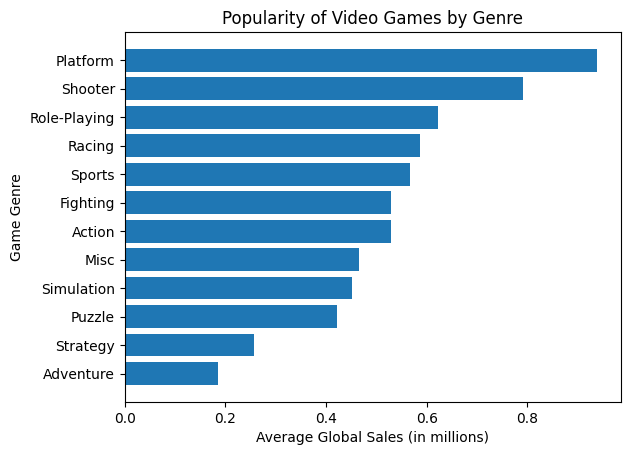

In [55]:
genre = games.groupby("Genre")["Global_Sales"].mean().sort_values().reset_index()
plt.barh(genre["Genre"], genre["Global_Sales"])
plt.xlabel("Average Global Sales (in millions)")
plt.ylabel("Game Genre")
plt.title("Popularity of Video Games by Genre")

We can see that the 5 most popular genres in the world are platformers, shooters, role-playing, racing, and sports.

Text(0.5, 1.0, 'Popularity of Video Game Platforms')

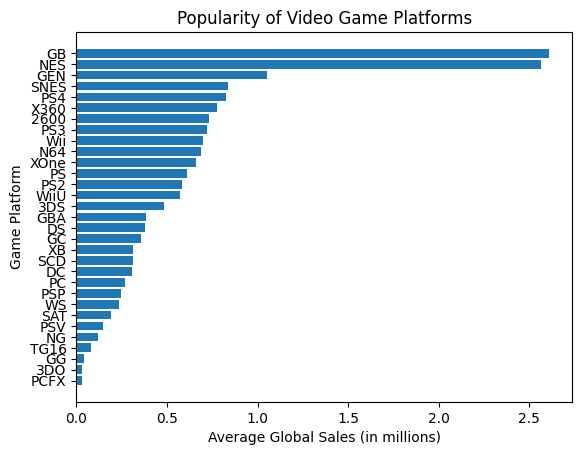

In [60]:
platform = games.groupby("Platform")["Global_Sales"].mean().sort_values().reset_index()
plt.barh(platform["Platform"], platform["Global_Sales"])
plt.xlabel("Average Global Sales (in millions)")
plt.ylabel("Game Platform")
plt.title("Popularity of Video Game Platforms")

We can see the top 5 video game platforms are GB (Nintendo Gameboy) , NES (Nintendo Entertainment System), GEN (Sega Genesis), SNES (Super Nintendo Entertainment System), and PS4 (Playstation 4).

Now, I'll look at the trend of video game sales of the top 5 genres over time.

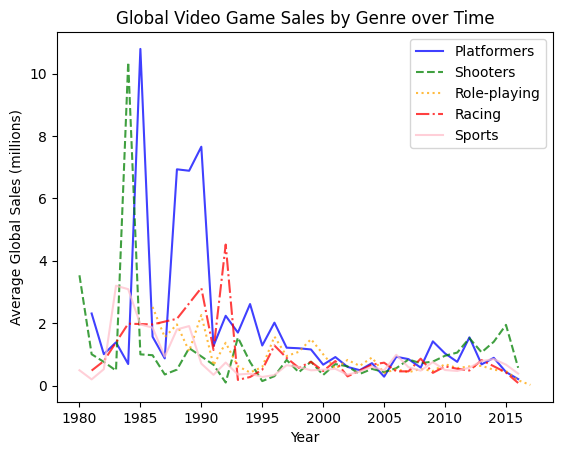

In [105]:
platformers = games[games["Genre"] == "Platform"].groupby("Year")["Global_Sales"].mean().reset_index()
shooters = games[games["Genre"] == "Shooter"].groupby("Year")["Global_Sales"].mean().reset_index()
rpg = games[games["Genre"] == "Role-Playing"].groupby("Year")["Global_Sales"].mean().reset_index()
racing = games[games["Genre"] == "Racing"].groupby("Year")["Global_Sales"].mean().reset_index()
sports = games[games["Genre"] == "Sports"].groupby("Year")["Global_Sales"].mean().reset_index()

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(platformers["Year"], platformers["Global_Sales"], color = "blue", label = "Platformers", alpha = 0.75, linestyle = "solid")
ax.plot(shooters["Year"], shooters["Global_Sales"], color = "green", label = "Shooters", alpha = 0.75, linestyle = "dashed")
ax.plot(rpg["Year"], rpg["Global_Sales"], color = "orange", label = "Role-playing", alpha = 0.75, linestyle = "dotted")
ax.plot(racing["Year"], racing["Global_Sales"], color = "red", label = "Racing", alpha = 0.75, linestyle = "dashdot")
ax.plot(sports["Year"], sports["Global_Sales"], color = "pink", label = "Sports", alpha = 0.75)
ax.set_xlabel("Year")
ax.set_ylabel("Average Global Sales (millions)")
ax.set_title("Global Video Game Sales by Genre over Time")
ax.legend()

Looking at the timeseries for genres over time, we can see that platformers and shooters were extremely popular in the 80s, with platformers having a resurgence in the early 90s. Platformers and shooters remain the most popular genres today, with shooters taking over in popularity in more recent years.

Now, I'll look at the same trend over time by genre, but now compare North American, European, and Japanese sales.

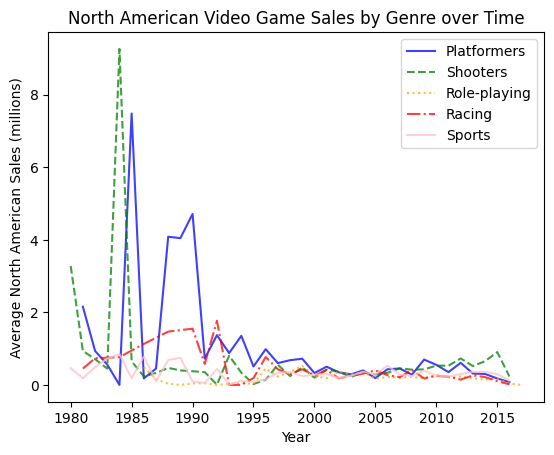

In [106]:
#North American Sales
platformers = games[games["Genre"] == "Platform"].groupby("Year")["NA_Sales"].mean().reset_index()
shooters = games[games["Genre"] == "Shooter"].groupby("Year")["NA_Sales"].mean().reset_index()
rpg = games[games["Genre"] == "Role-Playing"].groupby("Year")["NA_Sales"].mean().reset_index()
racing = games[games["Genre"] == "Racing"].groupby("Year")["NA_Sales"].mean().reset_index()
sports = games[games["Genre"] == "Sports"].groupby("Year")["NA_Sales"].mean().reset_index()

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(platformers["Year"], platformers["NA_Sales"], color = "blue", label = "Platformers", alpha = 0.75, linestyle = "solid")
ax.plot(shooters["Year"], shooters["NA_Sales"], color = "green", label = "Shooters", alpha = 0.75, linestyle = "dashed")
ax.plot(rpg["Year"], rpg["NA_Sales"], color = "orange", label = "Role-playing", alpha = 0.75, linestyle = "dotted")
ax.plot(racing["Year"], racing["NA_Sales"], color = "red", label = "Racing", alpha = 0.75, linestyle = "dashdot")
ax.plot(sports["Year"], sports["NA_Sales"], color = "pink", label = "Sports", alpha = 0.75)
ax.set_xlabel("Year")
ax.set_ylabel("Average North American Sales (millions)")
ax.set_title("North American Video Game Sales by Genre over Time")
ax.legend()

Overall, the trends appear mostly the same for North American and Global sales. One notable difference is that the peak popularity of racing games in the mid 90s is less significant in North American sales than it is for Global sales.

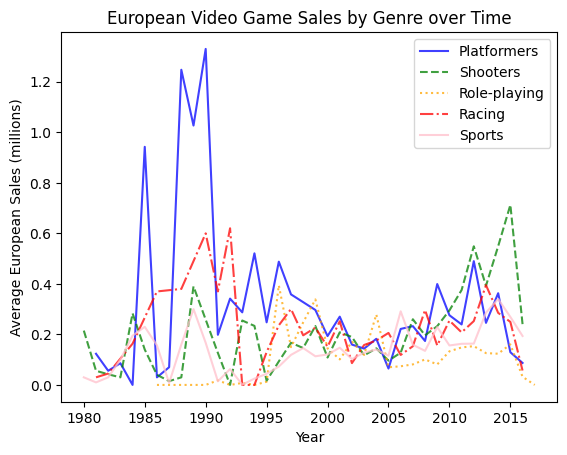

In [107]:
#European sales
platformers = games[games["Genre"] == "Platform"].groupby("Year")["EU_Sales"].mean().reset_index()
shooters = games[games["Genre"] == "Shooter"].groupby("Year")["EU_Sales"].mean().reset_index()
rpg = games[games["Genre"] == "Role-Playing"].groupby("Year")["EU_Sales"].mean().reset_index()
racing = games[games["Genre"] == "Racing"].groupby("Year")["EU_Sales"].mean().reset_index()
sports = games[games["Genre"] == "Sports"].groupby("Year")["EU_Sales"].mean().reset_index()

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(platformers["Year"], platformers["EU_Sales"], color = "blue", label = "Platformers", alpha = 0.75, linestyle = "solid")
ax.plot(shooters["Year"], shooters["EU_Sales"], color = "green", label = "Shooters", alpha = 0.75, linestyle = "dashed")
ax.plot(rpg["Year"], rpg["EU_Sales"], color = "orange", label = "Role-playing", alpha = 0.75, linestyle = "dotted")
ax.plot(racing["Year"], racing["EU_Sales"], color = "red", label = "Racing", alpha = 0.75, linestyle = "dashdot")
ax.plot(sports["Year"], sports["EU_Sales"], color = "pink", label = "Sports", alpha = 0.75)
ax.set_xlabel("Year")
ax.set_ylabel("Average European Sales (millions)")
ax.set_title("European Video Game Sales by Genre over Time")
ax.legend()

Keeping in mind that the y axis adjusts scales for each plot summarizing the sales of different regions, the trend for European sales also mimics that of Global and North American sales.

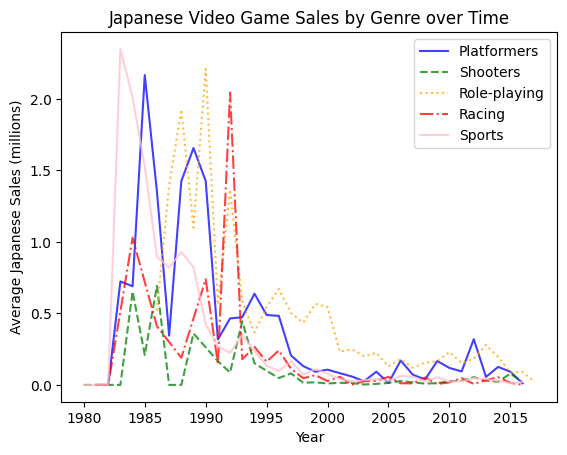

In [108]:
#Japanese sales
platformers = games[games["Genre"] == "Platform"].groupby("Year")["JP_Sales"].mean().reset_index()
shooters = games[games["Genre"] == "Shooter"].groupby("Year")["JP_Sales"].mean().reset_index()
rpg = games[games["Genre"] == "Role-Playing"].groupby("Year")["JP_Sales"].mean().reset_index()
racing = games[games["Genre"] == "Racing"].groupby("Year")["JP_Sales"].mean().reset_index()
sports = games[games["Genre"] == "Sports"].groupby("Year")["JP_Sales"].mean().reset_index()

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(platformers["Year"], platformers["JP_Sales"], color = "blue", label = "Platformers", alpha = 0.75, linestyle = "solid")
ax.plot(shooters["Year"], shooters["JP_Sales"], color = "green", label = "Shooters", alpha = 0.75, linestyle = "dashed")
ax.plot(rpg["Year"], rpg["JP_Sales"], color = "orange", label = "Role-playing", alpha = 0.75, linestyle = "dotted")
ax.plot(racing["Year"], racing["JP_Sales"], color = "red", label = "Racing", alpha = 0.75, linestyle = "dashdot")
ax.plot(sports["Year"], sports["JP_Sales"], color = "pink", label = "Sports", alpha = 0.75)
ax.set_xlabel("Year")
ax.set_ylabel("Average Japanese Sales (millions)")
ax.set_title("Japanese Video Game Sales by Genre over Time")
ax.legend()

Now this is a bit more interesting. We see a departure from the trends seen with the Global, North American, and European sales. Instead of platformers and shooters dominating the 80s and 90s, sports games, platformers, role-playing games, and racing games each have a significant peak through the mid 80s to the mid 90s.

I'm not surprised to see that Japan's gaming behavior differs from the other major regions. Japan is home to Nintendo, one of the largest and most culturally significant video game companies in the world.